In [12]:
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler, RobustScaler, Normalizer
from sklearn import model_selection
from sklearn.model_selection import train_test_split,RepeatedKFold,cross_val_score
from plotnine import ggplot, aes, geom_tile, scale_fill_gradient, theme_minimal, theme, geom_boxplot
from plotnine import ggsave, scale_y_reverse, labs, scale_fill_gradient2,geom_line,geom_point,scale_color_manual,geom_text
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score,roc_curve, auc
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
import xgboost as xgb
from tqdm import tqdm
import Standardizer
import Encoder
import Interaction
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_absolute_error,mean_squared_error,explained_variance_score
import shap

In [13]:
college = pd.read_csv('college_learn_rate.csv')
nyc = pd.read_csv('nyc_learn_rate.csv')
stl = pd.read_csv('stl_learn_rate.csv')
phi = pd.read_csv('phi_learn_rate.csv')

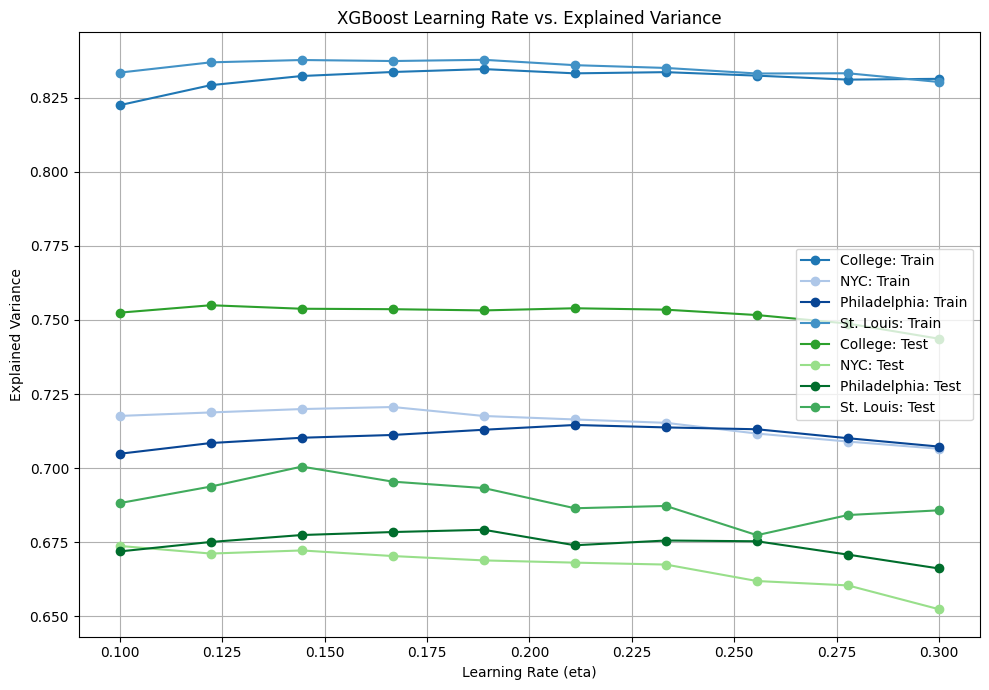

In [15]:
# Plot results
plt.figure(figsize=(10, 7))
#plt.figure(figsize=(10, 7))

# --- TRAIN curves first ---
plt.plot(college['Eta'], college['Train'], color='#1f77b4', marker='o', label='College: Train')
plt.plot(nyc['Eta'], nyc['Train'], color='#aec7e8', marker='o', label='NYC: Train')
plt.plot(phi['Eta'], phi['Train'], color='#084594', marker='o', label='Philadelphia: Train')
plt.plot(stl['Eta'], stl['Train'], color='#4292c6', marker='o', label='St. Louis: Train')

# --- TEST curves second ---
plt.plot(college['Eta'], college['Test'], color='#2ca02c', marker='o', label='College: Test')
plt.plot(nyc['Eta'], nyc['Test'], color='#98df8a', marker='o', label='NYC: Test')
plt.plot(phi['Eta'], phi['Test'], color='#006d2c', marker='o', label='Philadelphia: Test')
plt.plot(stl['Eta'], stl['Test'], color='#41ab5d', marker='o', label='St. Louis: Test')

plt.xlabel('Learning Rate (eta)')
plt.ylabel('Explained Variance')
plt.title("XGBoost Learning Rate vs. Explained Variance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("XGBoost_LearningRate_vs_Explained_variance_AllCities_Ordered.png", format="png", dpi=300)
plt.show()

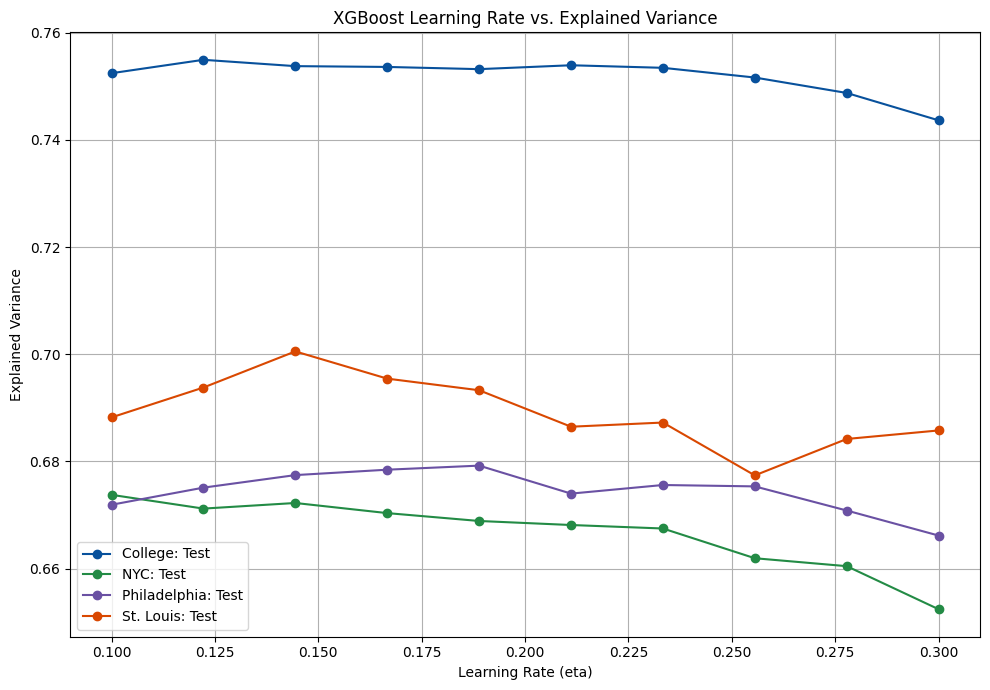

In [17]:
# Plot results
plt.figure(figsize=(10, 7))

# College - Blue
#plt.plot(college['Eta'], college['Train'], color='#9ecae1', marker='o', label='College: Train')  # Light blue
plt.plot(college['Eta'], college['Test'], color='#08519c', marker='o', label='College: Test')    # Dark blue

# NYC - Green
#plt.plot(nyc['Eta'], nyc['Train'], color='#a1d99b', marker='o', label='NYC: Train')              # Light green
plt.plot(nyc['Eta'], nyc['Test'], color='#238b45', marker='o', label='NYC: Test')                # Dark green

# Philadelphia - Purple
#plt.plot(phi['Eta'], phi['Train'], color='#dadaeb', marker='o', label='Philadelphia: Train')     # Light purple
plt.plot(phi['Eta'], phi['Test'], color='#6a51a3', marker='o', label='Philadelphia: Test')       # Dark purple

# St. Louis - Orange
#plt.plot(stl['Eta'], stl['Train'], color='#fdd0a2', marker='o', label='St. Louis: Train')        # Light orange
plt.plot(stl['Eta'], stl['Test'], color='#d94801', marker='o', label='St. Louis: Test')          # Dark orange

plt.xlabel('Learning Rate (eta)')
plt.ylabel('Explained Variance')
plt.title("XGBoost Learning Rate vs. Explained Variance")
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig("XGBoost_LearningRate_vs_Explained_variance_AllCities_GroupedByCity.png", format="png", dpi=300)
plt.show()